<a href="https://colab.research.google.com/github/manyamahe/emotion-recognition-photos/blob/main/House_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
house_price_dataset = fetch_california_housing()

In [ ]:
#importing the boston housing data set
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
house_price_dataframe =pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

loading the dataset to the pandas dataframe

In [ ]:
# printing first 5 rows of out Dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# add the target (price) column to the DataFrame
house_price_dataframe['price']=house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#cheaking the number of rows and columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [ ]:
#cheaking for any missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
#statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
#understanding the corellation between various features in the dataset

#1. positive correlation
#2. negative correlation

correlation =house_price_dataframe.corr()

<Axes: >

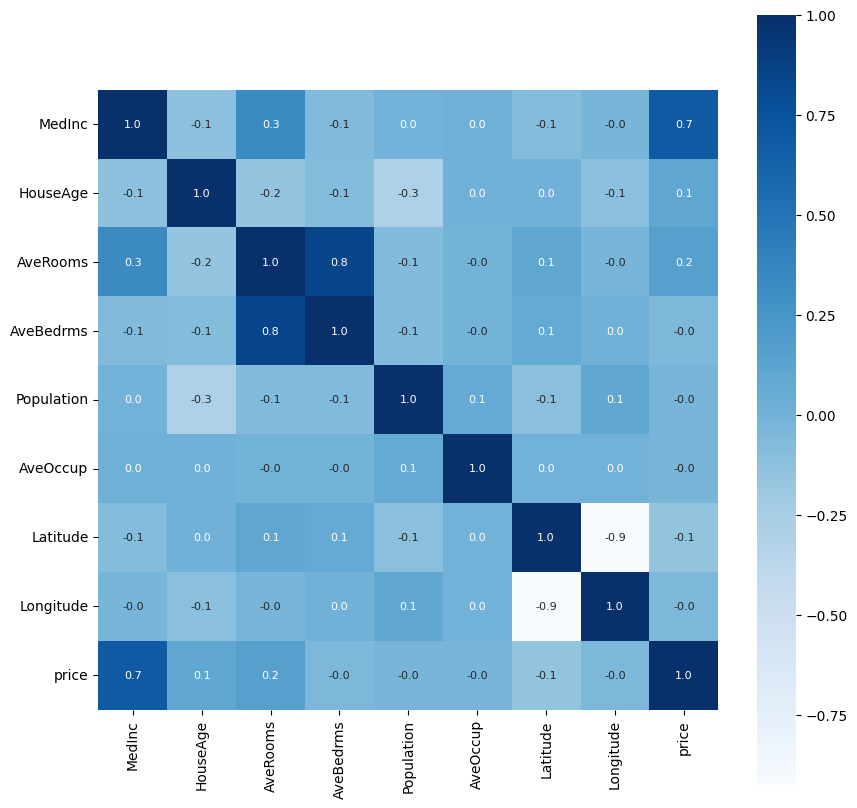

In [ ]:
#mataplotlib is used for the graph formation similarly (basic data visualization)
#seaborn - built on the top of mataplotlib for visually appealing , statistically -oriented plots with less code
#constructing  a heatmap to understand the correlation

#cbar is the color bar - more the + value more it is positive correlated
# fmt-how many float values do you want .1f one decimal , .2f two decimal
#annot - feature name and all the values and other info is abouot the text size etc.
#cmap -m is the color i want map to mantion
#very useful foe data analysis

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#splitting the data and the target(price)
#if you dropping a column than the axis =1 , for row axis =0
x=house_price_dataframe.drop(['price'],axis=1)
y=house_price_dataframe['price']


print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

### `Splitting the data `

In [ ]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=2)

Splitting the data into training data and test data
So i have this training data(x_train) and the corresponding label for this training data will be stored in this y_train

and now i have this test data and it will be used to evaluate our model and the labels for the test data is the y_test array



so you can represent any nuber as 2 or 3  so each value represent on kind of splitting  

if you are using the same piece of code
if you want to split the data in the same way the data is splitting in that same piece of code  use same randon_state value or if  different use different randon_state value

In [ ]:
print(x.shape, x_train.shape,x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# Model training

XGBoost Regression (type of decision tree model (on ensemble model - combines multiple models(usually many decision tree) to make a ) )

In [ ]:
#loading the model
model=XGBRegressor()

In [ ]:
#training the model with X_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Note**  we have previously learned that **accuracy score as evalution metric** but we can't use it bcz all the values are in numbers  for regression problem  rather we use **r square error and absolute error**

# Evaluation

accuracy for predicting on taining data

In [ ]:
# predicting the data
training_data_prediction = model.predict(x_train)


In [ ]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


comparing the pridicted value with y_test to calculate the the accuracy

In [ ]:
# R square error or mean absolute error (in regression)

#R square error
score_1 = metrics.r2_score(y_train,training_data_prediction)
# will find the varience between y_train and training_data_pridiction

#mean absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediction)

if the model r square error is 10 or more than 10 than our model is not performing well
 (should be close to 0)

In [ ]:
print("R Square error :",score_1)
print(" Mean Absolute error :",score_2)

R Square error : 0.943650140819218
 Mean Absolute error : 0.1933648700612105


visualizing the actual prices and predicted prices

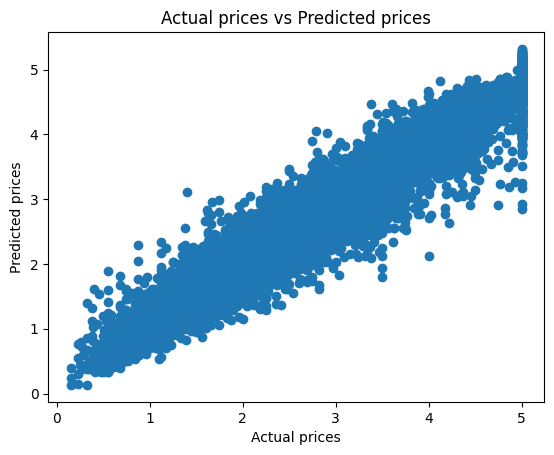

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

**Note** more the data, more our model will pridict right result

predicting on the test values


In [ ]:
# predicting the data on the test data
test_data_prediction = model.predict(x_test)

In [ ]:
# R square error or mean absolute error (in regression)

#R square error
score_1 = metrics.r2_score(y_test, test_data_prediction)
# will find the varience between y_train and training_data_pridiction

#mean absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediction)


print("R Square error :",score_1)
print(" Mean Absolute error :",score_2)

R Square error : 0.8338000331788725
 Mean Absolute error : 0.3108631800268186


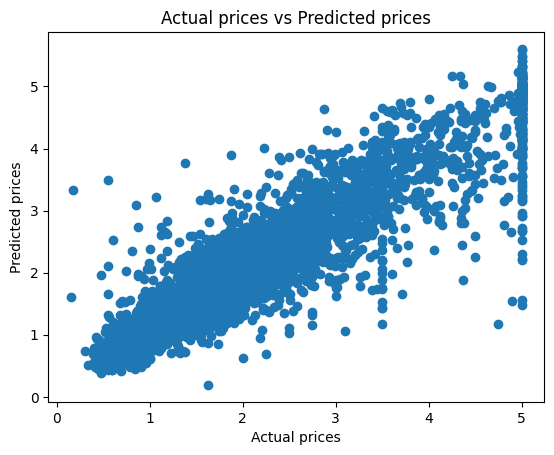

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()